## Models

* Independent Cascade
    * Independent fixed chance p for a node to infect each of its neighbors
    * Only once chance for each infected node, after that infected but not infectious
    * Technically complex acc to book
* Threshold
    * Decidedly complex contagion
    * Value k, how many of a nodes neighbors need to be infected for node to get infected too
    * Should continue until all nodes with degree < k infected if well seeded
        * Technically possible for a cluster containing internal degrees > k to exist without a link node with degree > k to infected mass 
    * Nodes with degree < k never infected
* Randomized Threshold
    * Randomizes k between kl and ku for each node
    * Maybe more realistic?
    * Could also add clamp ku to node degree
        * Would make model continue until all nodes infected 
* Percentage Threshold
    * Less realistic, probably
    * k is % of degree, makes hubs difficult to infect
    * Could still randomize k
* Threshold + chance
    * Once a node reaches k infected neighbors, neighbors only have a p chance of infected it per timestep
    * Infectable nodes WILL still get infected eventually
* Randomized threshold + chance + single shot
    * Maybe most realistic to keep some nodes uninfected while still adding stochasticity
    * IMPORTANT DIFFERENCE to note:
        * In ICM, each *infectious* node has one chance to infect
        * Each uninfected node can still have multiple chances to *get* infected
        * In this, each *uninfected* node would have one chance to get infected
        * This, in addition to the threshold, might make the infection harder to spread
    * Could randomize the chance within a range too
        

## Degree Distribution

Social networks tend to be somewhat scale free, that is their degree distributions follow a power law.

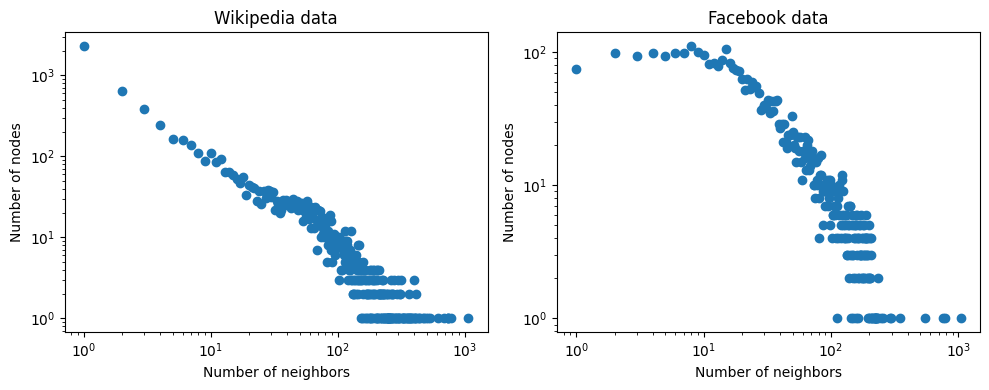

In [6]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

def GetDegrees(G):
    n = [len(list(G.neighbors(node))) for node in G.nodes]
    n.sort()
    return n

W = nx.read_edgelist("Wiki-Vote.txt", comments = "#")
FB = nx.read_edgelist("facebook_combined.txt")

Wdegrees = Counter(GetDegrees(W))
FBdegrees = Counter(GetDegrees(FB))

fig, axes = plt.subplots(1,2, figsize=(10,4))

axes[0].scatter(Wdegrees.keys(), Wdegrees.values())
axes[0].set_xlabel("Number of neighbors")
axes[0].set_ylabel("Number of nodes")
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_title("Wikipedia data")

axes[1].scatter(FBdegrees.keys(), FBdegrees.values())
axes[1].set_xlabel("Number of neighbors")
axes[1].set_ylabel("Number of nodes")
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_title("Facebook data")

plt.tight_layout()
plt.show()


## Village importation test

Importing data from an adjacency matrix about relationships in an Indian village http://hdl.handle.net/1902.1/21538

In [7]:
import numpy as np
import networkx as nx

matrix = np.loadtxt("vilno_69.csv", delimiter=",")

matrix = matrix.astype(int)

G = nx.from_numpy_array(matrix)

print("Number of households: ", len(list(G.nodes)))

Number of households:  180


## Notes/Small Observations:

coreHD spread the infection much faster than highest degree in fb set under threshold (which is deterministic)
6 timesteps vs 11 for similar reach (2448 vs 2447)